## Model #2 Feature Selection - Neural Network

In [1]:
# Import libraries
import pandas as pd
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
# Load the prepared data from the pickle file
data = pickle.load(open('prepared_data.pkl', 'rb'))

In [3]:
# Split the data into features (X) and target (y)
# Removed features: family_size, yrs_experience -
# SOMEHOW IMPROVED THE 85% ACCURACY TO 87% HOW!!? The accuracy keeps changing.
feature_columns = ['customer_id', 'age', 'education_level','income', 'mortgage_amt', 'credit_card_acct', 'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct', 'online_acct']

X = data[feature_columns]
y = data['personal_loan']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the Neural Network model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)  # Adjust the hidden_layer_sizes and max_iter as desired
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluation

In [7]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8425


In [8]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1003    3]
 [ 186    8]]


In [9]:
# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1006
           1       0.73      0.04      0.08       194

    accuracy                           0.84      1200
   macro avg       0.79      0.52      0.50      1200
weighted avg       0.82      0.84      0.78      1200



In [10]:
# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_score)

AUC-ROC Score: 0.5191275030230986


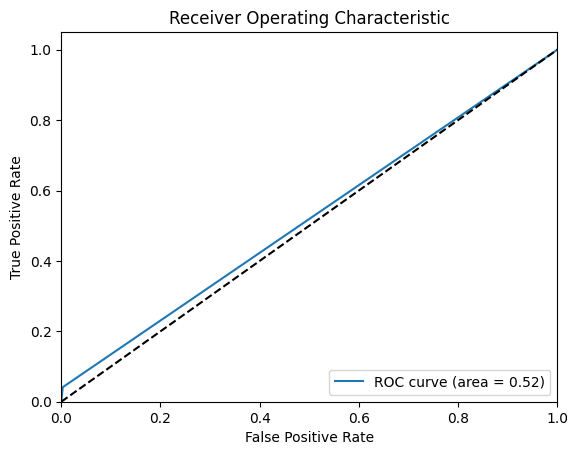

In [11]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Tune and Improve Model

In [12]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

In [13]:
# Initialize the GradientBoostingClassifier model
model = GradientBoostingClassifier()

In [14]:
# Perform Grid Search to find the best hyperparameters
# THIS TAKES A LONG TIME!!!
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [15]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [16]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

In [17]:
# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

In [18]:
# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
print("AUC-ROC Score:", auc)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9125
Confusion Matrix:
 [[968  38]
 [ 67 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1006
           1       0.77      0.65      0.71       194

    accuracy                           0.91      1200
   macro avg       0.85      0.81      0.83      1200
weighted avg       0.91      0.91      0.91      1200

AUC-ROC Score: 0.8084329077083887
